In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
import seaborn as sns
import yfinance as yf
import sys
sys.path.append("../src")
from ETFTrick import ETFTrick

# 1. Download Data

We retrieve daily **close prices** for the tickers `MSFT`, `AMZN`, and `SOXX`  
using the `yfinance` API, covering the period from **2022-01-01** to **2025-01-01**.

> ⚠️ As of recent versions, `yf.download()` defaults to `auto_adjust=True`,  
> which means prices are **adjusted for splits and dividends**.  
> This ensures the data already reflects *total returns* — so the ETF Trick logic works correctly without explicitly handling dividends or corporate actions.  
>  
> To obtain raw, unadjusted close prices, set `auto_adjust=False` explicitly.

In [2]:
tickers = ['MSFT', 'AMZN', 'SOXX']
close_prices = yf.download(tickers,
                          start='2022-01-01',
                          end='2025-01-01')['Close']

C:\Users\USER\AppData\Local\Temp\ipykernel_32440\2522356411.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close_prices = yf.download(tickers,
[*********************100%***********************]  3 of 3 completed


# 2. ETF Trick Application

We now apply the `ETFTrick` class to simulate a synthetic asset composed of a weighted combination of the underlying assets.

The class is initialized using:

```python
ETFTrick(prices, weights, normalize_weights=True)
```

### Parameters:

- `prices` *(np.ndarray or pd.DataFrame)*:  
  A (T, N) matrix of asset prices — each column represents a different asset.  
  If a DataFrame is passed, the index and column names are preserved throughout.

- `weights` *(np.ndarray or pd.Series)*:  
  A vector of length N specifying the desired portfolio weights.  
  Negative weights are allowed, enabling short positions.

- `normalize_weights` *(bool, default=True)*:  
  If set to `True`, the weights will automatically be normalized to sum to 1 if they don't already.

---

For demonstration purposes, we define arbitrary weights — including short positions.  
If the weights do not sum to 1, we can enable automatic normalization via the `normalize_weights=True` parameter.

> ⚠️ **Note:**  
> Although the weights sum to 1, they include negative values. This enables short positions and leveraged behavior.  
>  
> Additionally, if the weights **do not sum to 1** and `normalize_weights=False` is used, a warning will be raised.


In [3]:
weights = np.array([-0.2, -0.2, 1.4])

In [4]:
etft = ETFTrick(
    prices=close_prices,
    weights=weights,
    normalize_weights=True
)

## 2.1 `fit`

The `fit` method performs the core calculations of the `ETFTrick` class, based on the provided asset prices and weights.  
It computes:

- Daily **returns** of the individual assets.
- **Cumulative returns** of each asset, starting from 1.
- Daily **virtual ETF returns** – the weighted combination of asset returns.
- **Cumulative ETF returns** – simulating the value of a synthetic ETF starting from 1.

```python
etft.fit()
```

After calling this method, you can access the following attributes:
- `etft.returns`: Matrix of asset-level daily returns.
- `etft.cumulative_returns`: Matrix of asset-level cumulative returns.
- `etft.etf_returns`: Daily returns of the synthetic ETF.
- `etft.etf_cumulative_returns`: Value of the synthetic ETF over time.

In [5]:
etft.fit()

# 3. Attributes

## 3.1. Assets returns

In [6]:
returns = etft.returns
cumulative_returns = etft.cumulative_returns

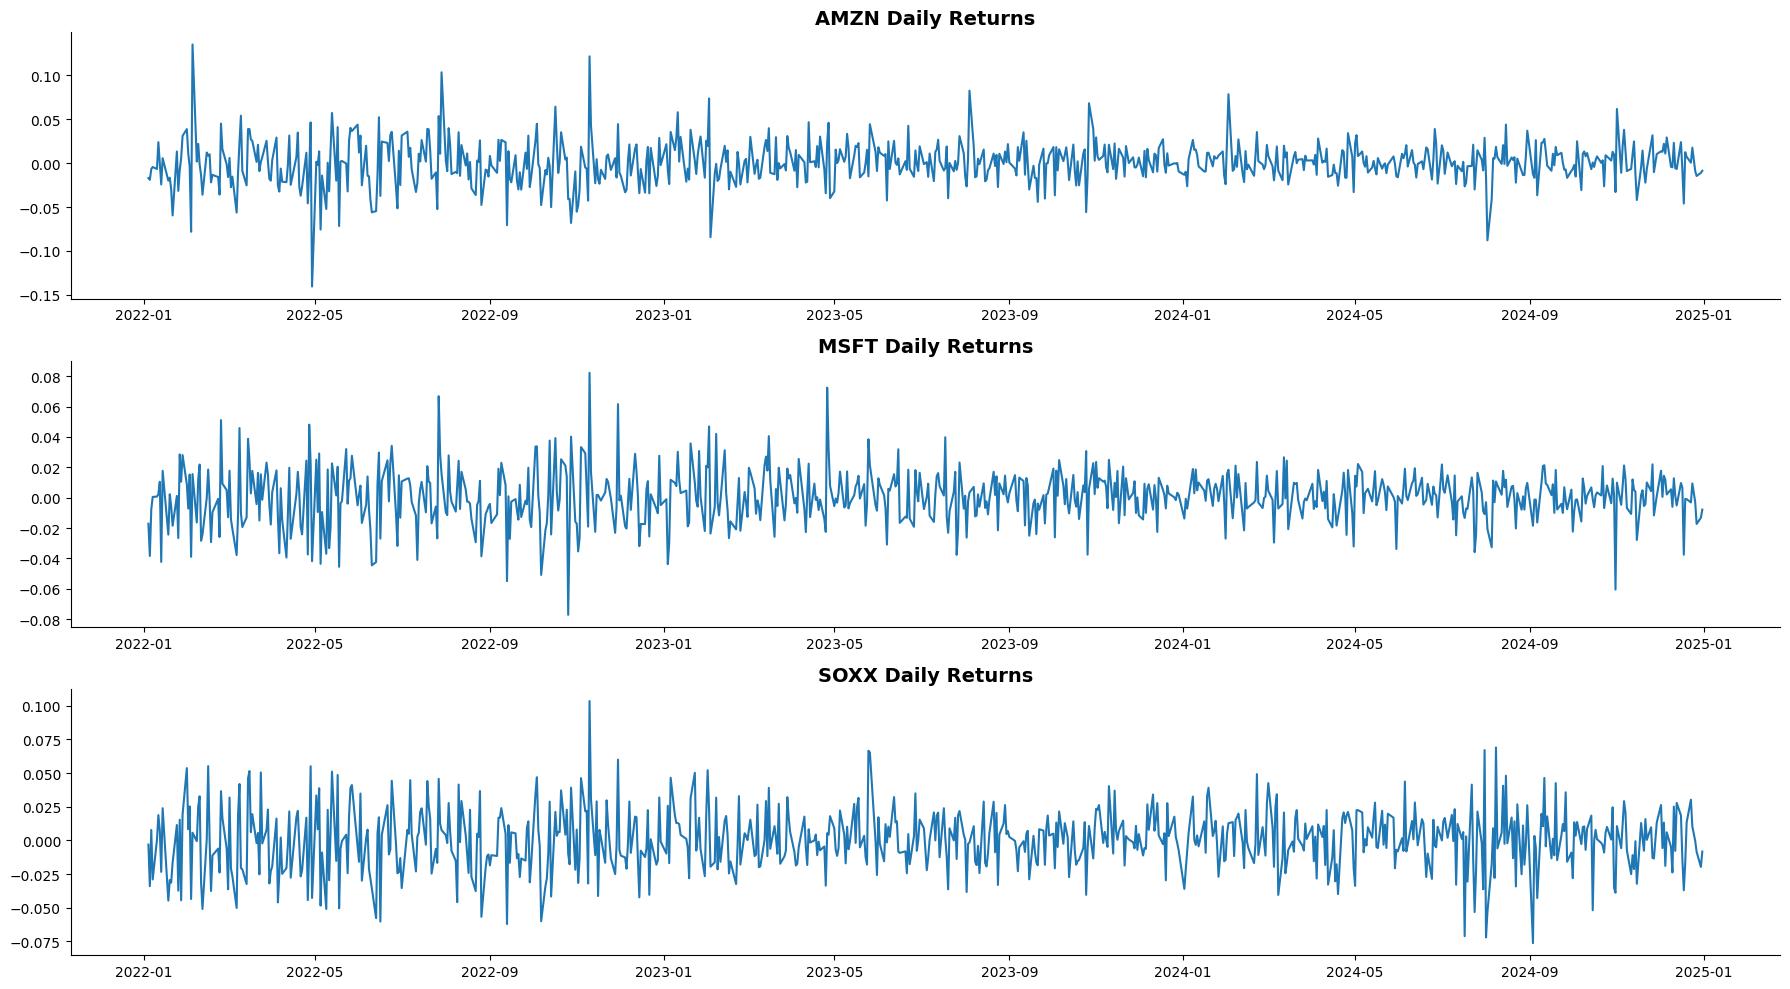

In [7]:
fig, ax = plt.subplots(3,1, figsize=(18,10))

for i, col in enumerate(returns.columns):
    ax[i].plot(returns[col])
    ax[i].set_title(f'{col} Daily Returns', size=14, weight='bold')

sns.despine()
plt.tight_layout()
plt.show()

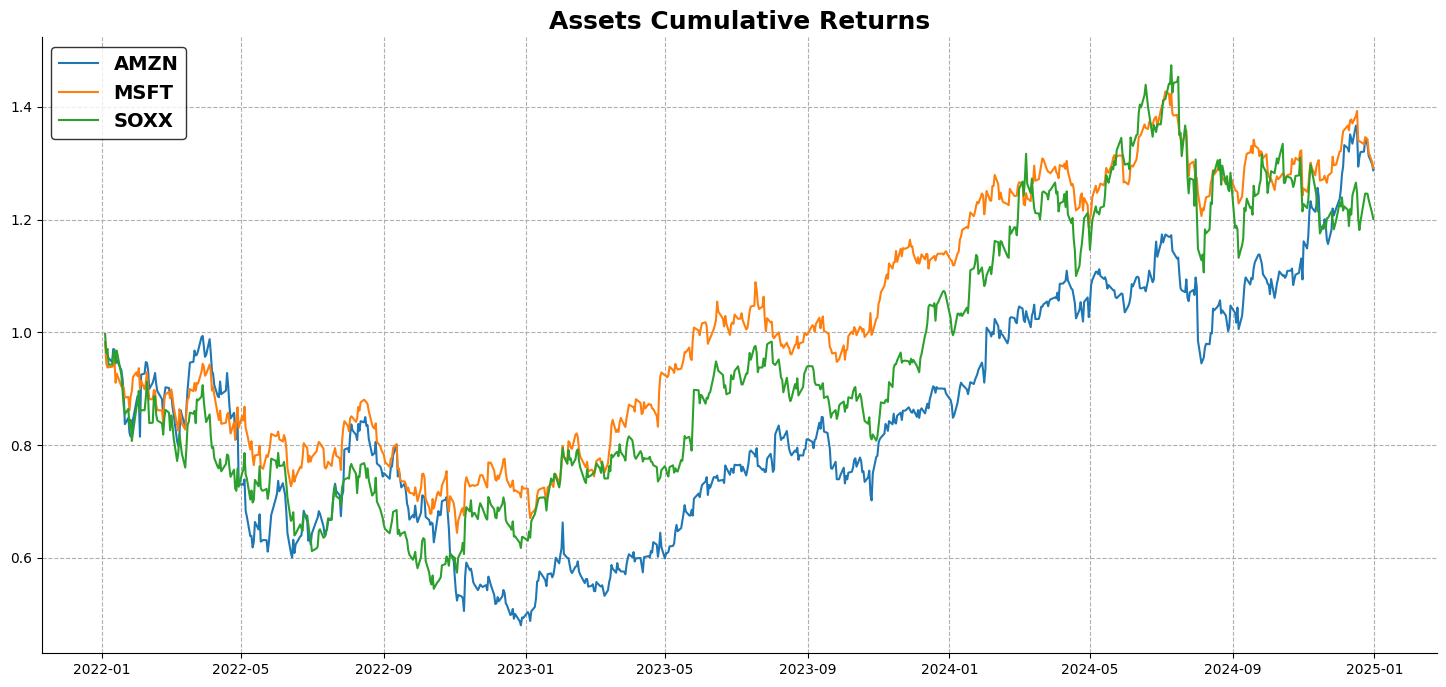

In [8]:
plt.figure(figsize=(18,8))
plt.plot(cumulative_returns)

plt.title('Assets Cumulative Returns', weight='bold', size=18)

plt.grid(ls='--')
plt.legend(cumulative_returns.columns,
           edgecolor='k',
          prop={'size': 14,
               'weight': 'bold'})

sns.despine()
plt.show()

## 3.2. ETF Returns

In [9]:
etft_returns = etft.etf_returns
etft_cumulative_returns = etft.etf_cumulative_returns

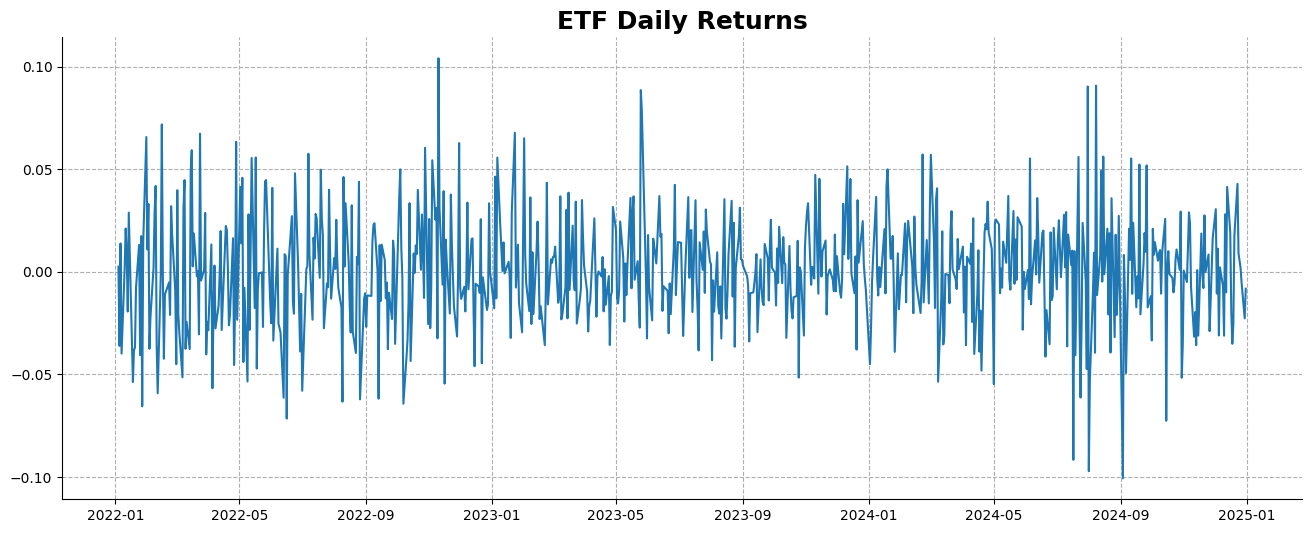

In [10]:
plt.figure(figsize=(16,6))
plt.plot(etft_returns)
plt.title('ETF Daily Returns', weight='bold', size=18)
plt.grid(ls='--')
sns.despine()
plt.show()

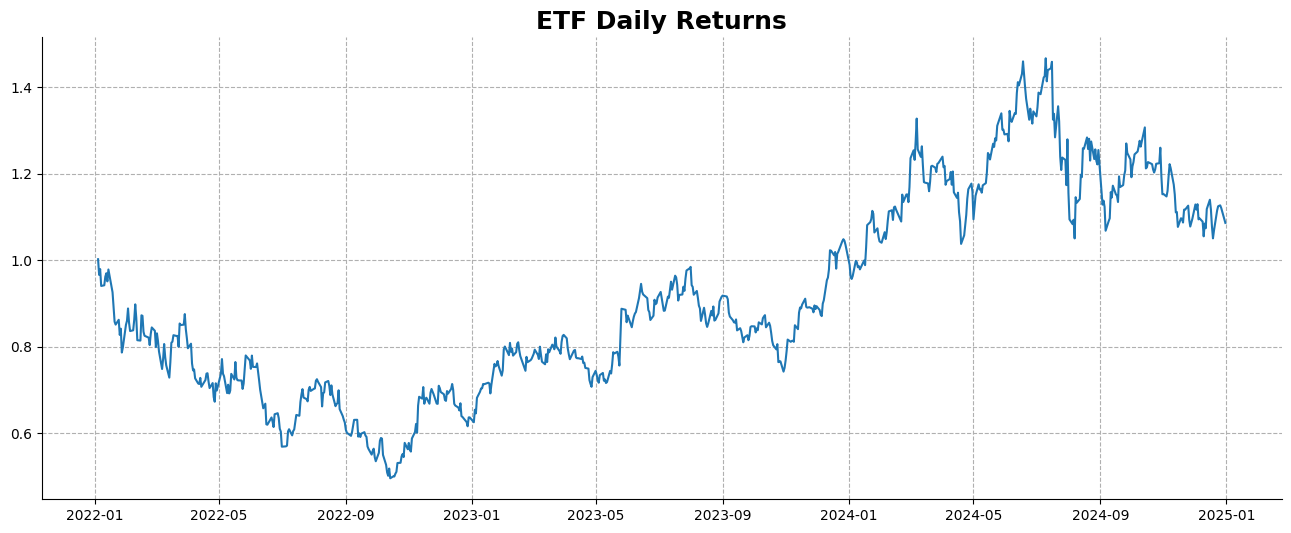

In [11]:
plt.figure(figsize=(16,6))
plt.plot(etft_cumulative_returns)
plt.title('ETF Daily Returns', weight='bold', size=18)
plt.grid(ls='--')
sns.despine()
plt.show()

## References

- De Prado, M. L. (2018). *Advances in Financial Machine Learning.* Wiley.